# Simple Linear & Polynomial Regresstion

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.
The need of Polynomial Regression in ML can be understood in the below points:

-If we apply a linear model on a linear dataset, then it provides us a good result as we have seen in Simple Linear Regression, but if we apply the same model without any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased.

-So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. We can understand it in a better way using the below comparison diagram of the linear dataset and non-linear dataset.

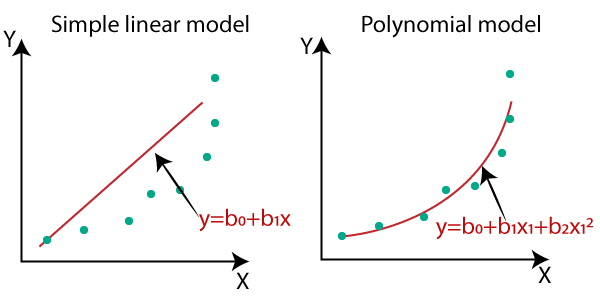

In [1]:
### Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Import the Data

df = pd.read_csv('Real_estate.csv')
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
### Determin Features and Label value

X= df.drop('Y house price of unit area', axis=1)
y= df['Y house price of unit area']
X.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


## Simple Linear Regression

In [8]:
## LINEAR REGRESSION MODEL

### Split Dataset to Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Train the Model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

### Data Prediction
y_pred = model.predict(X_test)
pd.DataFrame({'Data_Test':y_test, 'Data_Predict': y_pred}).head(10)


,Data_Test,Data_Predict
176,19.2,12.802665
347,11.2,9.549151
307,24.7,22.516894
299,46.1,48.213227
391,31.3,31.972364
212,31.1,37.788209
104,30.5,36.461296
311,42.2,40.760966
98,51.0,48.114551
198,39.1,40.497840


In [9]:
###  Evaluation Model

from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE],index=['MAE','MSE','RMSE'], columns=['METRICS']).head()

,METRICS
MAE,5.373025
MSE,45.880307
RMSE,6.773500


Text(0, 0.5, 'Y_Pred')

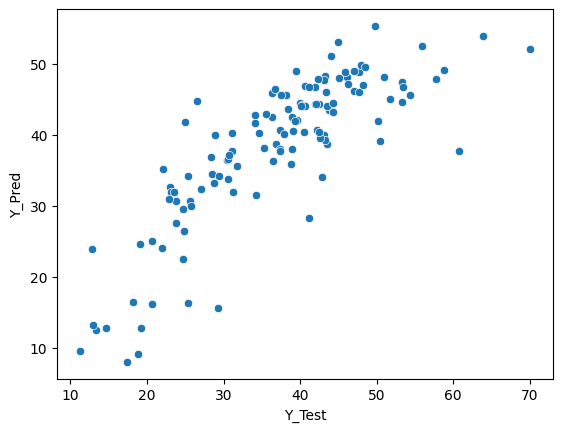

In [10]:
#Residuals
sns.scatterplot(x= y_test, y=y_pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Pred')

## Polynomial Regression

In [12]:
df.shape

(414, 8)

In [13]:
## POLYNOMIAL REGRESSION

from sklearn.preprocessing import PolynomialFeatures
poly_converter = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = poly_converter.fit_transform(X)
poly_features.shape

(414, 35)

In [17]:
## Split Dataset to Train & Test
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
polymodel_norm = LinearRegression()
model_fitted_normalized = polymodel_norm.fit(X_poly_train, y_poly_train )
print(polymodel_norm.coef_.shape)

(35,)


In [22]:
##Data Prediction
y_poly_pred = polymodel_norm.predict(X_poly_test)
pd.DataFrame({'Actual Data Test':y_test, 'simple Linear Prediction': y_pred,'Poly Linear Prediction':y_poly_pred, 'Poly Residuals': y_poly_test-y_poly_pred}).head()

,Actual Data Test,simple Linear Prediction,Poly Linear Prediction,Poly Residuals
176,19.2,12.802665,16.382272,2.817728
347,11.2,9.549151,3.929481,7.270519
307,24.7,22.516894,17.438132,7.261868
299,46.1,48.213227,47.146092,-1.046092
391,31.3,31.972364,27.340914,3.959086


In [23]:
## Evaluation
from sklearn import metrics
MAE_Poly = metrics.mean_absolute_error(y_poly_test,y_poly_pred)
MSE_Poly = metrics.mean_squared_error(y_poly_test,y_poly_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly], index=['MAE_Poly', 'MSE_Poly', 'RMSE_Poly'], columns=['metrics'])

,metrics
MAE_Poly,4.490907
MSE_Poly,32.402909
RMSE_Poly,5.692355
